In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pytorch-lightning
!pip install wandb

     |████████████████████████████████| 584 kB 5.0 MB/s 
     |████████████████████████████████| 136 kB 26.5 MB/s 
     |████████████████████████████████| 408 kB 54.2 MB/s 
     |████████████████████████████████| 596 kB 42.3 MB/s 
     |████████████████████████████████| 1.1 MB 33.0 MB/s 
     |████████████████████████████████| 271 kB 45.3 MB/s 
     |████████████████████████████████| 144 kB 51.1 MB/s 
     |████████████████████████████████| 94 kB 3.0 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 1.8 MB 4.3 MB/s 
     |████████████████████████████████| 144 kB 25.5 MB/s 
     |████████████████████████████████| 181 kB 15.7 MB/s 
     |████████████████████████████████| 63 kB 1.1 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=5fdea7d174c3ae069be87a6baf5639936641133bf43b21c5bd7b13f263dc922c
  Stor

In [3]:
import wandb

wandb.init(project="CS505-analysis", entity="divsp")

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [65]:
def load_dataset_from_drive(data_type='train', lang='spanish'):
  tweet_ids = '/content/drive/MyDrive/CS505-FinalProject/' + data_type + '/' + lang +'/tweet_by_ID_30_4_2022__02_47_48.txt.ids'
  
  tweet_text = '/content/drive/MyDrive/CS505-FinalProject/' + data_type + '/' + lang + '/es_train.txt.text'

  tweet_labels = '/content/drive/MyDrive/CS505-FinalProject/' + data_type + '/' + lang + '/es_train.txt.labels'

  tweet_text_df = pd.read_csv(tweet_text, sep= '\n\t', names=["TEXT"])
  tweet_labels_df = pd.read_csv(tweet_labels, names=["LABELS"])
  tweet_ids_df = pd.read_csv(tweet_ids)

  
  tweet_labels_df = map_label_to_token('es', tweet_labels_df)
  # tweet_text_df = add_label_suffix_to_string(tweet_text_df, tweet_labels_df)


  return tweet_text_df, tweet_labels_df
  
  

In [73]:
def load_dataset_from_drive_english(data_type='train', lang='english'):
  tweet_ids = '/content/drive/MyDrive/CS505-FinalProject/' + data_type + '/' + lang +'/tweet_by_ID_30_4_2022__04_17_45.txt.ids'
  
  tweet_text = '/content/drive/MyDrive/CS505-FinalProject/' + data_type + '/' + lang + '/tweet_by_ID_30_4_2022__04_17_45.txt.text'

  tweet_labels = '/content/drive/MyDrive/CS505-FinalProject/' + data_type + '/' + lang + '/tweet_by_ID_30_4_2022__04_17_45.txt.labels'

  tweet_text_df = pd.read_csv(tweet_text, sep= '\n\t', names=["TEXT"])
  tweet_labels_df = pd.read_csv(tweet_labels, names=["LABELS"])
  tweet_ids_df = pd.read_csv(tweet_ids)

  
  tweet_labels_df = map_label_to_token('us', tweet_labels_df)
  # tweet_text_df = add_label_suffix_to_string(tweet_text_df, tweet_labels_df)


  return tweet_text_df, tweet_labels_df

In [58]:
def map_label_to_token(lang, label_dataframe):
  lang_emojis = get_emoji_mappings(lang)
  label_dataframe = label_dataframe.replace(lang_emojis)

  return label_dataframe

def add_label_suffix_to_string(text_df, label_df):
  for index in text_df.index:
     text_df['TEXT'][index] = text_df['TEXT'][index] + " " + str(label_df['LABELS'][index].upper())
  return text_df

In [59]:
def get_emoji_mappings(lang):
  if lang == 'us':
    mapping_path = '/content/drive/MyDrive/CS505-FinalProject/mapping/consolidated_mapping.txt'
  if lang == 'es':
    mapping_path = '/content/drive/MyDrive/CS505-FinalProject/mapping/consolidated_mapping.txt'
  emoji_df = pd.read_csv(mapping_path, sep='\t', names=['emoji','emoji_code', 'smt'])

  emoji_label_map = {}
  for emj_idx in range(len(emoji_df['emoji_code'])):
    emoji_label_map[emj_idx] = ("<" + emoji_df['emoji_code'][emj_idx] + ">").upper()
  return(emoji_label_map)


In [61]:
spanish_emojis = get_emoji_mappings('en')
spanish_emojis

{0: '<_RED_HEART_>',
 1: '<_SMILING_FACE_WITH_HEARTEYES_>',
 2: '<_FACE_WITH_TEARS_OF_JOY_>',
 3: '<_TWO_HEARTS_>',
 4: '<_FIRE_>',
 5: '<_SMILING_FACE_WITH_SMILING_EYES_>',
 6: '<_SMILING_FACE_WITH_SUNGLASSES_>',
 7: '<_SPARKLES_>',
 8: '<_BLUE_HEART_>',
 9: '<_FACE_BLOWING_A_KISS_>',
 10: '<_CAMERA_>',
 11: '<_UNITED_STATES_>',
 12: '<_SUN_>',
 13: '<_PURPLE_HEART_>',
 14: '<_WINKING_FACE_>',
 15: '<_HUNDRED_POINTS_>',
 16: '<_BEAMING_FACE_WITH_SMILING_EYES_>',
 17: '<_CHRISTMAS_TREE_>',
 18: '<_CAMERA_WITH_FLASH_>',
 19: '<_WINKING_FACE_WITH_TONGUE_>',
 20: '<_FLEXED_BICEPS_>',
 21: '<_OK_HAND_>',
 22: '<_SPAIN_>',
 23: '<_REVOLVING_HEARTS_>',
 24: '<_MUSICAL_NOTES_>',
 25: '<_HEART_WITH_ARROW_>'}

In [40]:
# import preprocessor as Preprocessor
from nltk.corpus import stopwords
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [41]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [81]:
my_stopwords = set(stopwords.words('spanish'))
my_stopwords.update(['will','amp', 'user'])
my_stopwords_english = set(stopwords.words('english'))
my_stopwords_english.update(['will','amp', 'user'])
def draw_wc(dataframe,my_stopwords):
    # text = dataframe[dataframe['label']==label]['pre_text']
    text = ' '.join(dataframe['TEXT'].tolist())
    wordcloud = WordCloud(stopwords=my_stopwords).generate(text)

    # Display the generated image
    plt.figure(figsize=(15,20))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [43]:
spanish_tweet_text, spanish_tweet_labels = load_dataset_from_drive('train', 'spanish')

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [44]:
spanish_tweet_text

,TEXT
0,Es imposible quererte más @ Plaza Del Callao -...
1,Disfrutando de buena comida con buena compañía...
2,Muchísimas Felicidades M!!! Nos vemos pronto! ...
3,Y pensar que a esta persona la conozco de hace...
4,¡Que buenas son las noches así y que buena com...
...,...
81160,Cena en Madrid. Plan perfecto para descansar d...
81161,Cuando este triste miraré esta batalla de gall...
81162,@user cooooomoooo me hueeeeeleeeee a olviiiido...
81163,Mi amor @ Bar Concha Velasco Almendralejo


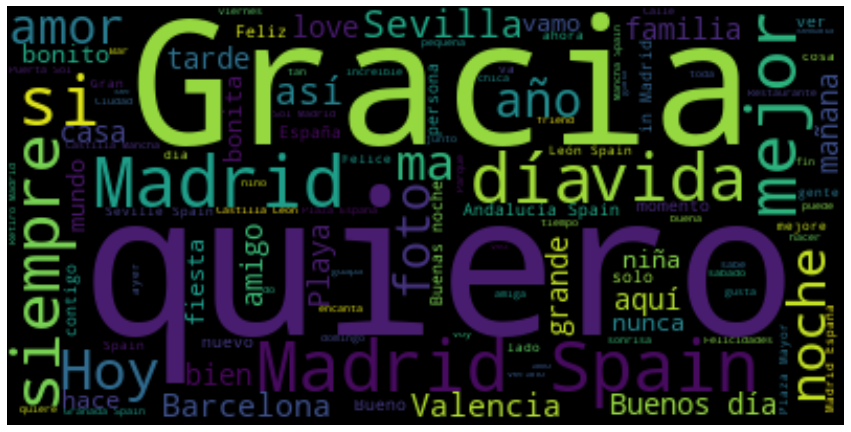

In [55]:
draw_wc(spanish_tweet_text, my_stopwords)

Analysis of English Data

In [63]:
english_emojis = get_emoji_mappings('us')
english_emojis

{0: '<_RED_HEART_>',
 1: '<_SMILING_FACE_WITH_HEARTEYES_>',
 2: '<_FACE_WITH_TEARS_OF_JOY_>',
 3: '<_TWO_HEARTS_>',
 4: '<_FIRE_>',
 5: '<_SMILING_FACE_WITH_SMILING_EYES_>',
 6: '<_SMILING_FACE_WITH_SUNGLASSES_>',
 7: '<_SPARKLES_>',
 8: '<_BLUE_HEART_>',
 9: '<_FACE_BLOWING_A_KISS_>',
 10: '<_CAMERA_>',
 11: '<_UNITED_STATES_>',
 12: '<_SUN_>',
 13: '<_PURPLE_HEART_>',
 14: '<_WINKING_FACE_>',
 15: '<_HUNDRED_POINTS_>',
 16: '<_BEAMING_FACE_WITH_SMILING_EYES_>',
 17: '<_CHRISTMAS_TREE_>',
 18: '<_CAMERA_WITH_FLASH_>',
 19: '<_WINKING_FACE_WITH_TONGUE_>',
 20: '<_FLEXED_BICEPS_>',
 21: '<_OK_HAND_>',
 22: '<_SPAIN_>',
 23: '<_REVOLVING_HEARTS_>',
 24: '<_MUSICAL_NOTES_>',
 25: '<_HEART_WITH_ARROW_>'}

In [74]:
english_tweet_text, english_tweet_labels = load_dataset_from_drive_english('train', 'english')

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [75]:
english_tweet_text

,TEXT
0,Step out and explore. # ️ @ Ellis Island Cafe
1,@user @ Cathedral Preparatory School
2,RuPaul's Drag Race bingo fun. Drag Queens be S...
3,Black History like a Mufffffaaaaaka #blacchyna...
4,@ BJ's Restaurant and Brewhouse
...,...
385270,Couldn't be more stoked to see mama tayblazesc...
385271,Dinner indian food (@ Bombay Curry in Melbourne)
385272,'Tis the season @ Starbucks
385273,We voted! #election2016 #vote #proudtobeanamer...


In [80]:
# my_stopwords_english

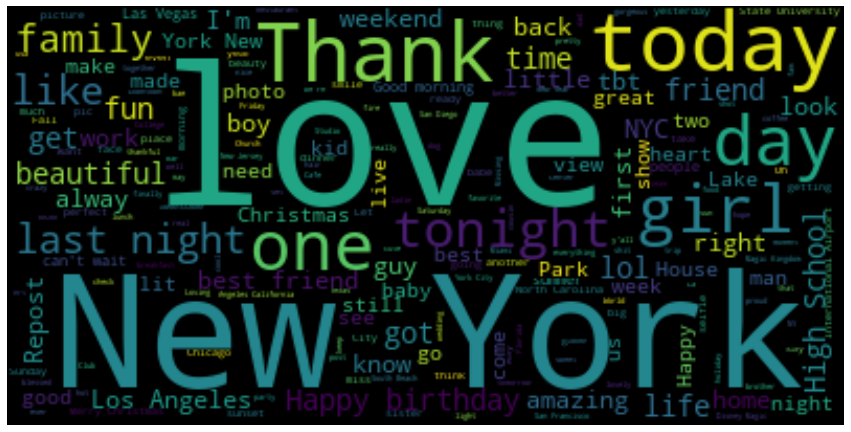

In [82]:
draw_wc(english_tweet_text, my_stopwords_english)

Histogram of spanish data

In [93]:
emoji_mapping_path = '/content/drive/MyDrive/CS505-FinalProject/mapping/consolidated_mapping.txt'
emoji_org_df = pd.read_csv(emoji_mapping_path, sep='\t', names=['emoji','emoji_code', 'smt'])

In [95]:
emoji_ord_dict = {}
for index, row in emoji_org_df.iterrows():
  emoji_ord_dict[ "<" + row['emoji_code'].upper() + ">"] = row['emoji']


In [96]:
emoji_ord_dict

{'<_BEAMING_FACE_WITH_SMILING_EYES_>': '😁',
 '<_BLUE_HEART_>': '💙',
 '<_CAMERA_>': '📷',
 '<_CAMERA_WITH_FLASH_>': '📸',
 '<_CHRISTMAS_TREE_>': '🎄',
 '<_FACE_BLOWING_A_KISS_>': '😘',
 '<_FACE_WITH_TEARS_OF_JOY_>': '😂',
 '<_FIRE_>': '🔥',
 '<_FLEXED_BICEPS_>': '💪',
 '<_HEART_WITH_ARROW_>': '💘',
 '<_HUNDRED_POINTS_>': '💯',
 '<_MUSICAL_NOTES_>': '🎶',
 '<_OK_HAND_>': '👌',
 '<_PURPLE_HEART_>': '💜',
 '<_RED_HEART_>': '❤',
 '<_REVOLVING_HEARTS_>': '💞',
 '<_SMILING_FACE_WITH_HEARTEYES_>': '😍',
 '<_SMILING_FACE_WITH_SMILING_EYES_>': '😊',
 '<_SMILING_FACE_WITH_SUNGLASSES_>': '😎',
 '<_SPAIN_>': '🇪🇸',
 '<_SPARKLES_>': '✨',
 '<_SUN_>': '☀',
 '<_TWO_HEARTS_>': '💕',
 '<_UNITED_STATES_>': '🇺🇸',
 '<_WINKING_FACE_>': '😉',
 '<_WINKING_FACE_WITH_TONGUE_>': '😜'}

In [109]:
def get_label_count_dict(label_df):
  label_dict = {}

  for index, row in label_df.iterrows():
    if row['LABELS'] in label_dict:
      label_dict[row['LABELS']] += 1
    else:
      label_dict[row['LABELS']] = 1
    
    new_label_dict = {}
    for emj in label_dict:
      new_label_dict[emoji_ord_dict[emj]] = label_dict[emj]

  return new_label_dict

In [110]:
english_label_dict = get_label_count_dict(english_tweet_labels)
spanish_label_dict = get_label_count_dict(spanish_tweet_labels)

In [125]:

english_label_dict

{'☀': 10462,
 '✨': 13812,
 '❤': 83058,
 '🇺🇸': 11685,
 '🎄': 9923,
 '💕': 19880,
 '💙': 12597,
 '💜': 9832,
 '💯': 10680,
 '📷': 12991,
 '📸': 10657,
 '🔥': 19971,
 '😁': 10403,
 '😂': 40220,
 '😉': 10640,
 '😊': 18399,
 '😍': 40740,
 '😎': 17067,
 '😘': 12623,
 '😜': 9635}

In [126]:
spanish_label_dict

{'✨': 2012,
 '❤': 16048,
 '🇪🇸': 2757,
 '🎶': 2102,
 '👌': 2880,
 '💕': 5321,
 '💘': 1899,
 '💙': 2357,
 '💜': 2212,
 '💞': 2038,
 '💪': 3119,
 '😁': 2198,
 '😂': 7722,
 '😉': 3111,
 '😊': 5447,
 '😍': 11398,
 '😎': 2597,
 '😘': 3658,
 '😜': 2289}

In [127]:
# from matplotlib.font_manager import FontProperties
# english_label_emoji = list(english_label_dict.keys())
# english_label_count = list(english_label_dict.values())


# plt.figure(figsize=(10,5))
# p1 = plt.bar(range(len(english_label_emoji)), english_label_count, tick_label=english_label_emoji)

# prop = FontProperties(fname='/System/Library/Fonts/Apple Color Emoji.ttc')
# for rect1, label in zip(p1, english_label_emoji):
#     height = rect1.get_height()
#     plt.annotate(
#         label,
#         (rect1.get_x() + rect1.get_width()/2, height+5),
#         ha="center",
#         va="bottom",
#         fontsize=30,
#         fontproperties=prop
#     )
# plt.show()